# **Revolutionizing Plant Health: Advanced Disease Detection with TensorFlow and Web App Deployment**


## **Revolutionizing Plant Health: A Leap Forward with Plant Disease Diagnostics**

**The Challenge**
- As the global population approaches 9 billion by 2050, the pressure is on to increase food production by an estimated 70%. Despite advancements, infectious diseases continue to slash agricultural yields by up to 40% on average, with some farmers in developing countries facing total losses. The necessity for innovative solutions has never been greater.

**The Opportunity**
- The explosive growth of smartphones globally over the past five years presents a unique opportunity. These devices are more than just communication tools; they are gateways to empowering farmers worldwide with cutting-edge technology. Our project focuses on transforming smartphones into advanced plant disease detection systems, utilizing the power of Machine Learning (ML) and Big Data.

**Our Solution**
- We are harnessing Google TensorFlow to create sophisticated disease detection models, which are then integrated into a user-friendly web app developed with Streamlit. This app is deployed on the AWS cloud, ensuring it can be accessed anywhere by the agricultural community. This approach not only enhances plant health but also supports sustainable agriculture practices by providing critical, real-time data to those who need it most.

**The Impact**
- By enabling farmers to detect diseases early and accurately, we are significantly reducing potential yield losses and ensuring more stable food supplies. This project is not just about technology; it's about creating a sustainable future and supporting diverse communities in their efforts to grow food more effectively.

## **Business Impact**:

- **Increased Agricultural Productivity**: Early and accurate disease detection reduces crop losses, significantly boosting yields and farmer income, particularly in vulnerable regions.
- **Market Expansion**: By leveraging smartphones, the technology taps into a broad user base, extending market reach and facilitating entry into global agricultural sectors.
- **Cost Efficiency**: Automating disease detection reduces the need for traditional, labor-intensive monitoring methods, cutting down costs for farmers and agricultural enterprises.
- **Data-Driven Insights**: Collecting data from users worldwide enables continuous improvement of disease detection algorithms and offers valuable insights into disease patterns and treatment efficacy.
- **Sustainable Agriculture**: Supports the transition to sustainable farming practices by enabling more precise and timely interventions, which can lead to reduced use of pesticides and better resource management.
- **Enhanced User Engagement**: The simplicity of a smartphone app increases user adoption rates, encouraging more farmers to integrate advanced technology into their farming practices.
- **Revenue Generation**: Offers new revenue streams through app subscriptions, premium features, or data analytics services provided to researchers and agricultural businesses.

## Step 1: Load Libraries

**Data Set**:

3 files included are as per the following:

- Corm common rust images
- Potato early blight images
- Tomato bacterial spot images 


In [1]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 35.0 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical 

2024-05-10 23:52:43.741278: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Step 2: View images to check Dataset

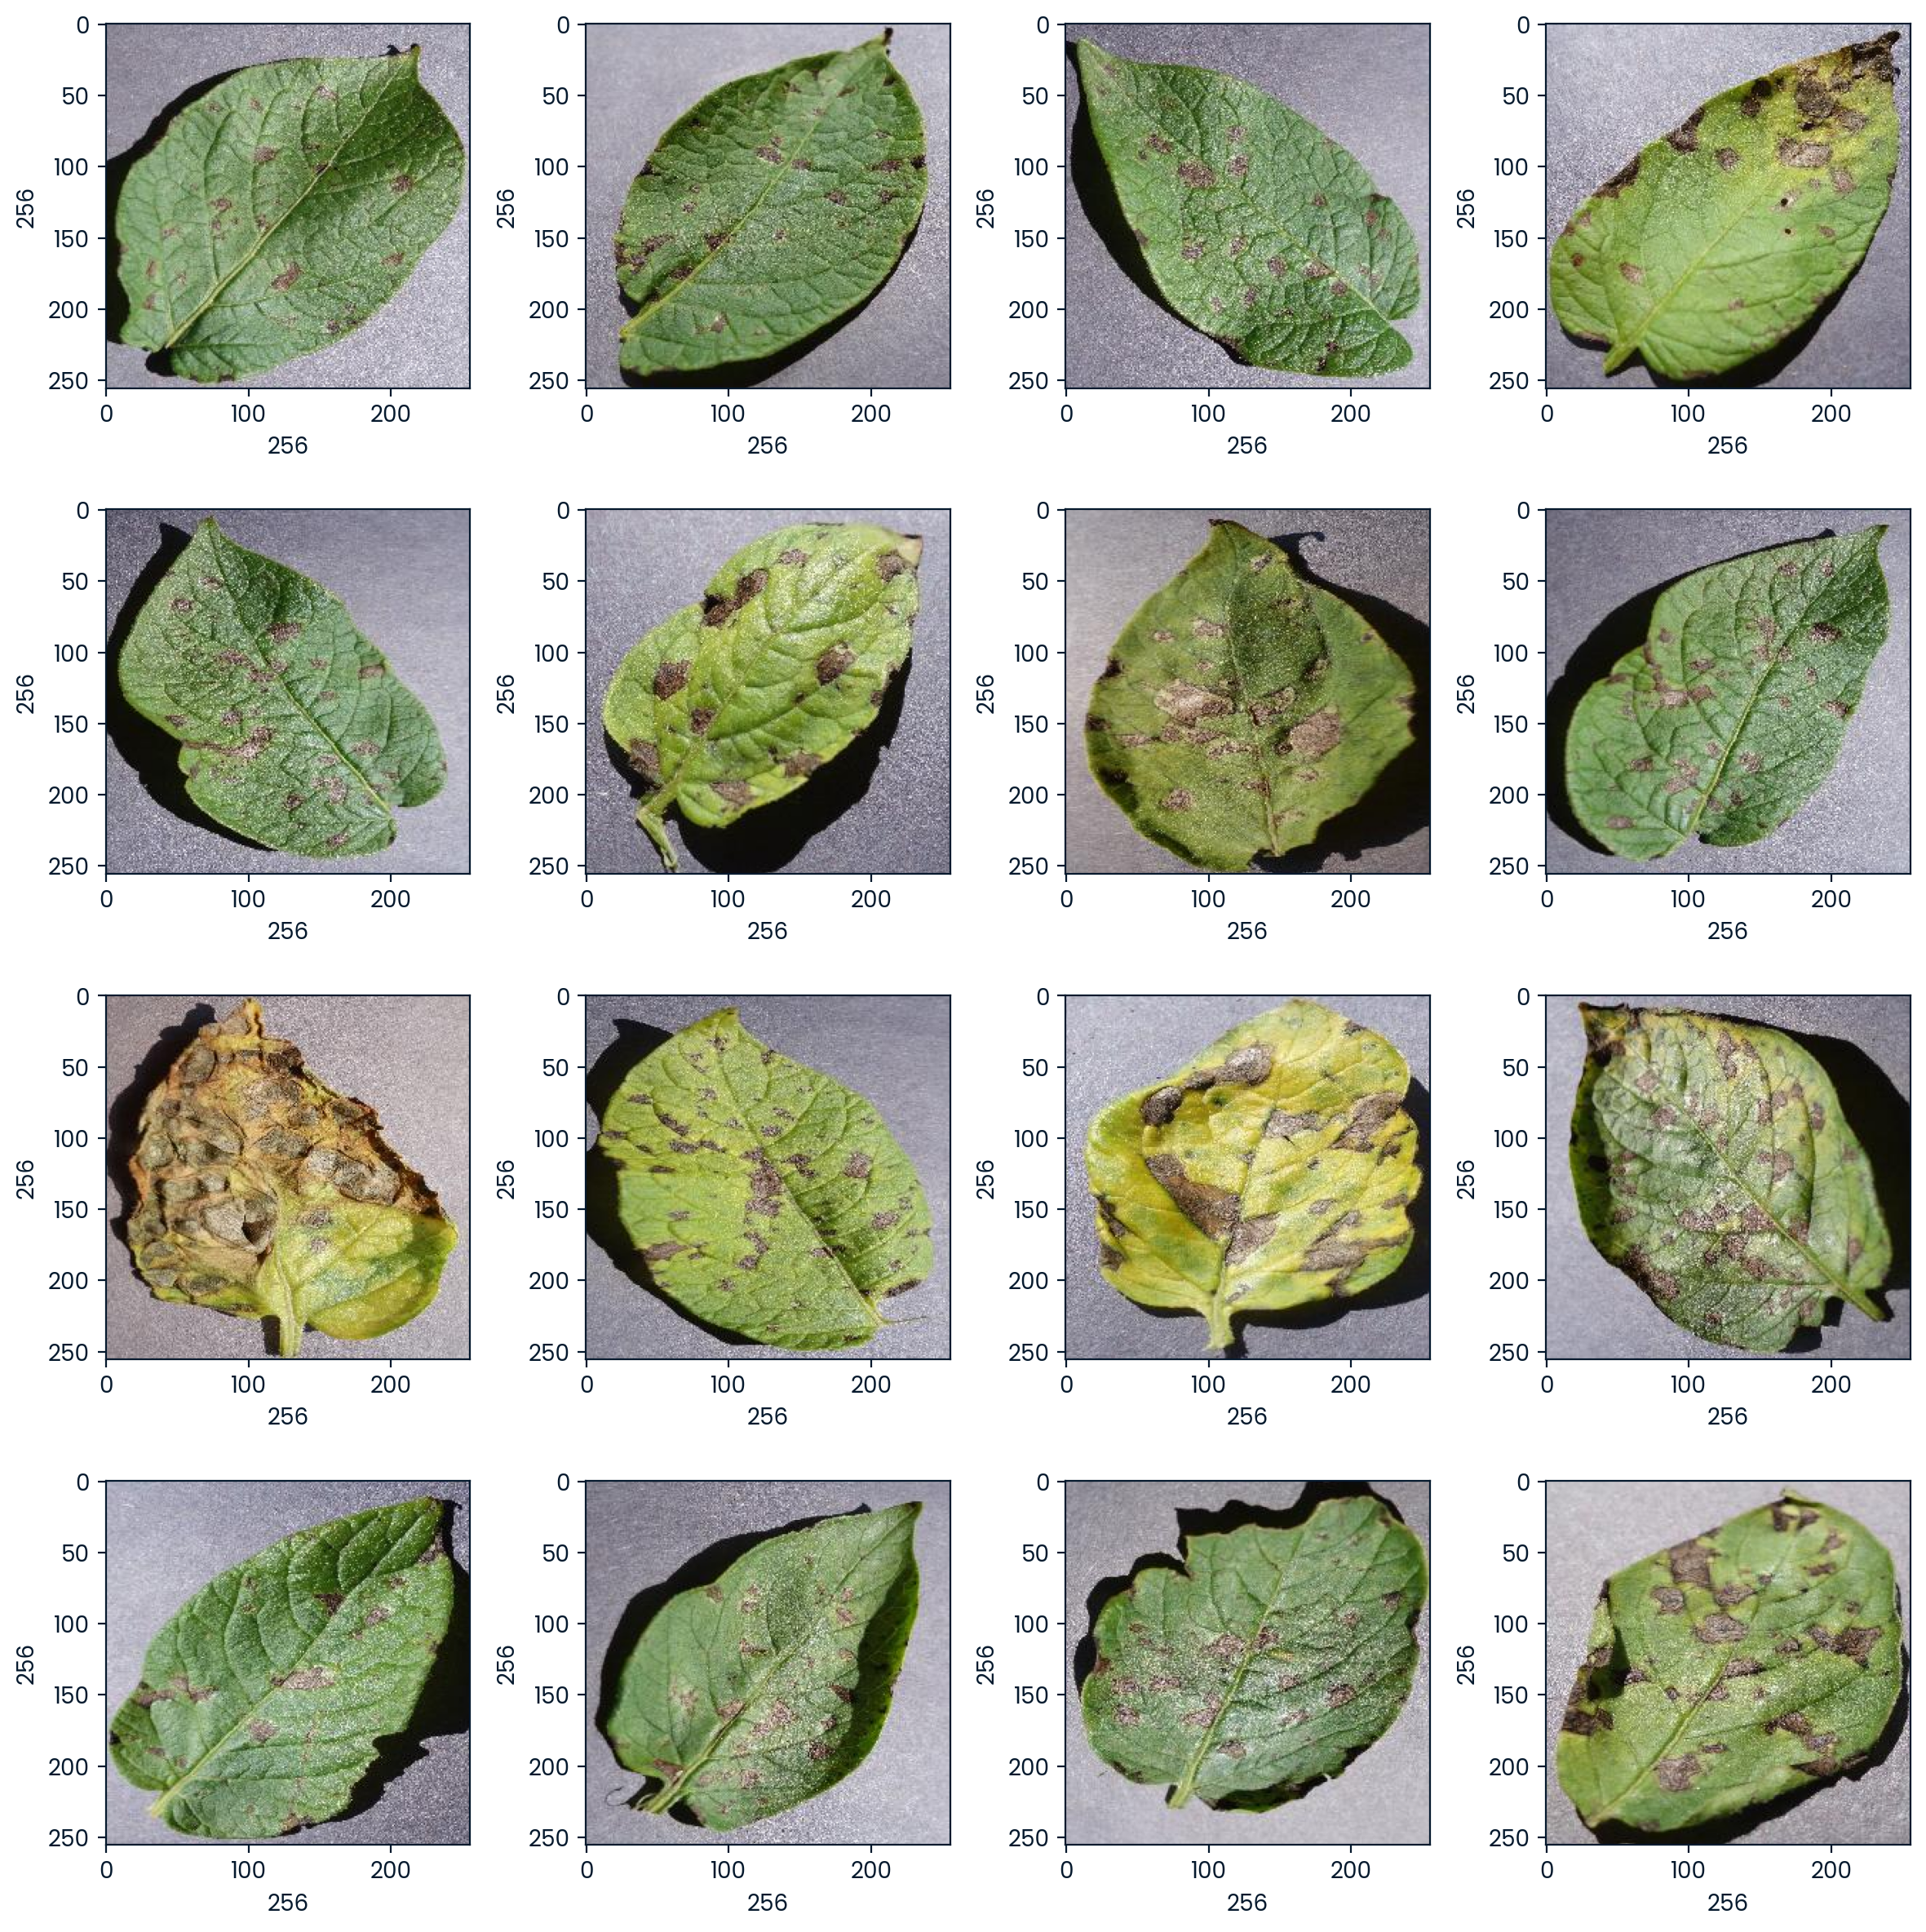

In [3]:
# Plot images to check dataset

plt.figure(figsize=(12,12))
path = "Plant images/Potato early blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

## Step 3: Convert images to a numpy array

In [4]:
#Converting Images to array 
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))  
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

Convert all the images into numpy array

In [5]:
dir = "Plant images"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

## Step 4: Data Preprocessing and Dataset split into test and train data.

In [6]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head(5)

0
0    300
1    300
2    300
Name: count, dtype: int64

Now check whether the dataset is balanced or not

In [7]:
image_list[0].shape

(256, 256, 3)

In [8]:
label_list = np.array(label_list)
label_list.shape

(900,)

Above are the total number of images which is the length of labels list

Now we will use sklearn train_test_split to split dataset into testing and training data.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [10]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [11]:
y_train = to_categorical(y_train)

In [12]:
y_test = to_categorical(y_test)

## Step 5: Model Building

Here we are creating a neural network architecture for the model. we are using different types of layers according to their features namely Conv_2d , max_pooling2d, flatten, Dense.

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 85, 85, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │       225,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,347 (903.70 KB)

 Trainable params: 231,347 (903.70 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])


## Step 6: Split training data into training and validation data sets

In [15]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

## Step 7: Train the model

In [16]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.2419 - loss: 1.0810 - val_accuracy: 0.4306 - val_loss: 0.9744
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4959 - loss: 0.9476 - val_accuracy: 0.5139 - val_loss: 0.8548
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5934 - loss: 0.8282 - val_accuracy: 0.6181 - val_loss: 0.7854
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6615 - loss: 0.7392 - val_accuracy: 0.6181 - val_loss: 0.7106
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6445 - loss: 0.6566 - val_accuracy: 0.7500 - val_loss: 0.6102
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8525 - loss: 0.5498 - val_accuracy: 0.7083 - val_loss: 0.5504
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8313 - loss: 0.4846 - val_accuracy: 0.8819 - val_loss: 0.4716
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9224 - loss: 0.4024 - val_accuracy: 0.8819 - val_loss: 0.4068
Epoch 9/50
5/5 ━

From the above we can see how the model is performing by viewing the training and validation accuracy.

## Step 8: Saving of the final model

In [17]:
model.save('plant_disease.h5')
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('plant_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('plant_model.weights.h5')

## Step 9: Plot the accuracy of the model for training history

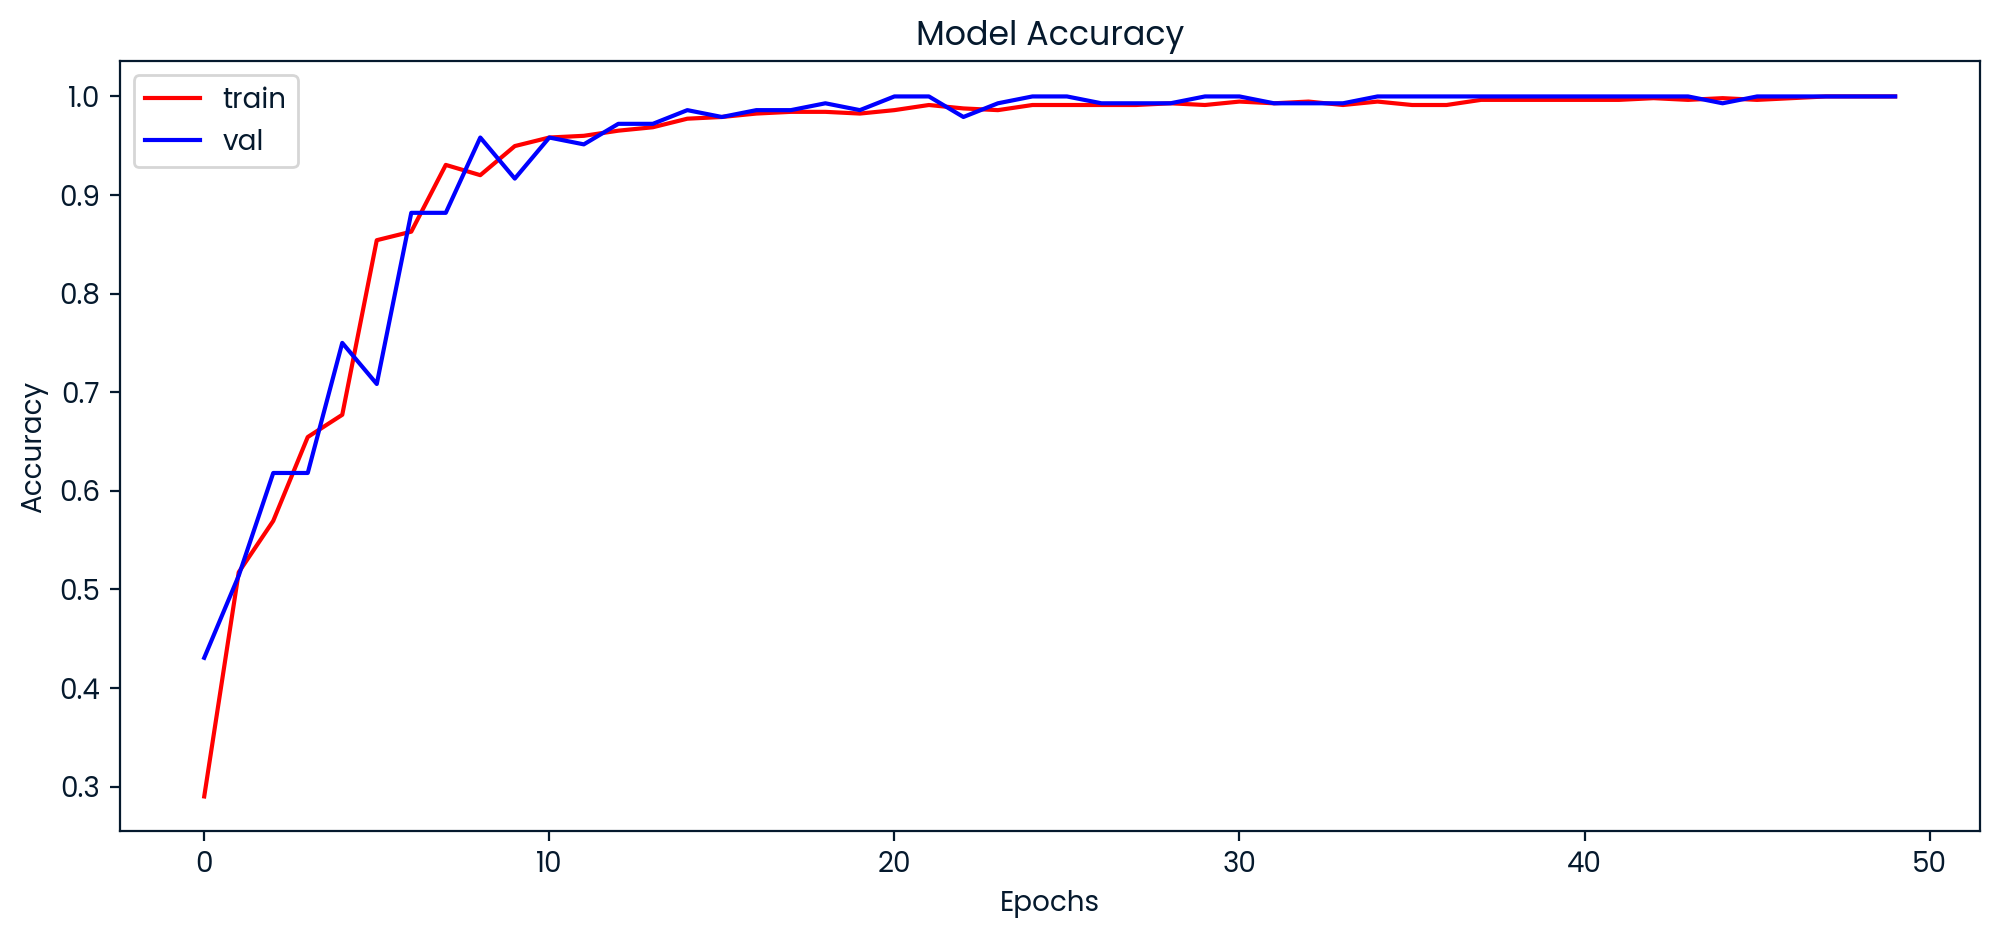

In [18]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [19]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9780 - loss: 0.0387
Test Accuracy: 97.77777791023254


## Step 10: Make prediction using the testing dataet label

In [20]:
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


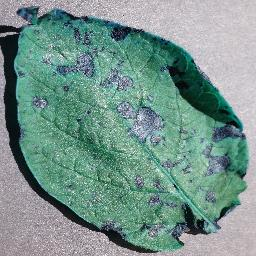

In [21]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

Find Max value from prediction list and comparing original value vs predicted 

In [22]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight


## Step 11: Conclusion

- We started with loading the dataset into Datacamp datalab and visualizing the images. Normalizing is an important step when working with any type of dataset. 
- After that we created a CNN Model which is further used for predicting the plant diseases using the image supplied to model. 
- This model is highly beneficial as it can be used by different agricultural firms and farmers to increase their yield and stop wastage of crops due to disease.